In [503]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import * 
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, plot_confusion_matrix #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics from sklearn.model_selection import cross_val_predict # cross validation metrics

import time 
%matplotlib inline

# Project 1

[This dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv) is adapted from the World Health Organization on Strokes (it's based on real data but is NOT REAL). Use this dataset to answer the following questions and perform the following tasks. Feel free to add extra cells as needed, but follow the structure listed here and clearly identify where each question is answered. Please remove any superflous code.

## Data Information

- `reg_to_vote`: 0 if no, 1 if yes.
- `age`: age of the patient in years.
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.
- `ever_married`: 0 if no, 1 if yes.
- `Residence_type`: 0 for Rural, 1 for Urban.
- `avg_glucose_level`: average glucose level in blood.
- `bmi`: body mass index.
- `smoking_status_smokes`, `smoking_status_formerly`: Whether or not the person smokes, or formerly smoked. If a person has 0's for both these columns, they never smoked.
- `stroke`: 1 if the patient had a stroke or 0 if not.
- `dog_owner`: 0 if no, 1 if yes.
- `er_visits`: number of recorded Emergency Room visits in lifetime.
- `racoons_to_fight`: number of racoons the patient belives they could fight off at once.
- `fast_food_budget_month`: amount (in US dollars) spent on fast food per month.


## Part I: Logistic Regression
Build a logistic regression model to predict whether or not someone had a `stroke` based on **all** the other variables in the dataset.

1. Count the missing data per column, and remove rows with missing data (if any).
2. Use 10 fold cross validation for your model validation. Z-score your continuous variables only. Store both the train and test accuracies to check for overfitting. **Is the model overfit? How can you tell?**
3. After completing steps 1-2, fit another logistic regression model on ALL of the data (no model validation; but do z score) using the same predictors as before, and put the coefficients into a dataframe called `coef`.
4. print out a confusion matrix for the model you made in part 3. **What does this confusion matrix tell you about your model? How can you tell?**

## Part II: Data Exploration
The WHO has asked the following five questions, create **at least 1 ggplot graph per question** (using the above data + model when needed) to help answer each question, and **explicitly answer the question in a Markdown cell** below your graph. You may use other calculations to help support your answer but MUST pair it with a graph. Write your answer as if you were explaining it to a non-data scientist. You will be graded on the effectiveness and clarity of your graph, as well as the completeness, clarity, and correctness of your responses and justifications.

1. In this specific data set, do dog-owners over 50 have a higher average probability of stoke than non-dog owners who currently smoke? How can you tell?
2. What is the relationship between average blood glucose and BMI? Is the relationship between those two variables different for people who are and are not registered to vote? How can you tell?
3. Is your logistic regression model most accurate for people who make less than 30k, between 30-90k, or over 100k? Discuss the potential accuracy *and* ethical implications if your model *were* more accurate for different groups (you can use the full model from part I-3 to check accuracy; DO NOT create/fit new models for each income range.).
4. Which of the following variables is the strongest predictor of having a stroke (owning a dog, residence type, marriage, being registered to vote)? How were you able to tell?
5. Create a variable `er_visits_per_year` that calculates the # of visits to the ER that a person has had per year of life. Store this variable in your data frame (no need to include this variable in the previous logistic regression model). Is the # of ER visits per year different for stroke and non-stroke patients? How can you tell?

## PART I

In [504]:
# PART I


proj = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/Proj1.csv")

proj.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,smoking_status_smokes,smoking_status_formerly,reg_to_vote,dog_owner,raccoons_to_fight,fast_food_budget_month,income_in_k,er_visits
0,60.0,1.0,0.0,0.0,1.0,73.00,25.2,0,1,0,1.0,1.0,10.0,209.19,51.553645,9.0
1,4.0,0.0,0.0,0.0,0.0,110.15,17.1,0,0,0,0.0,1.0,13.0,176.46,45.405414,5.0
2,77.0,0.0,0.0,1.0,1.0,68.38,27.8,0,0,0,0.0,1.0,6.0,213.00,94.865174,8.0
3,37.0,0.0,0.0,1.0,1.0,95.08,30.1,0,0,0,1.0,1.0,12.0,161.90,84.123775,8.0
4,44.0,0.0,0.0,0.0,0.0,103.78,40.9,0,1,0,1.0,1.0,11.0,261.29,74.794596,11.0


In [505]:
# PART I, 1
print(proj.isnull().sum(axis = 0))

proj = proj.dropna()

print(proj.isnull().sum(axis = 0))

age                         13
hypertension                12
heart_disease               21
ever_married                 9
Residence_type              21
avg_glucose_level           31
bmi                        575
stroke                       0
smoking_status_smokes        0
smoking_status_formerly      0
reg_to_vote                 14
dog_owner                   21
raccoons_to_fight           27
fast_food_budget_month       8
income_in_k                 21
er_visits                   15
dtype: int64
age                        0
hypertension               0
heart_disease              0
ever_married               0
Residence_type             0
avg_glucose_level          0
bmi                        0
stroke                     0
smoking_status_smokes      0
smoking_status_formerly    0
reg_to_vote                0
dog_owner                  0
raccoons_to_fight          0
fast_food_budget_month     0
income_in_k                0
er_visits                  0
dtype: int64


In [506]:
# PART I, 2 - Code
predictors = ["age", "hypertension", "heart_disease", "ever_married", 
              "Residence_type", "avg_glucose_level", "bmi", "smoking_status_smokes", 
              "smoking_status_formerly", "reg_to_vote", "dog_owner", "raccoons_to_fight",
              "fast_food_budget_month", "income_in_k", "er_visits"]

continuous_predictors = ["age", "avg_glucose_level", "bmi", "raccoons_to_fight", "fast_food_budget_month",
                         "income_in_k", "er_visits"]

X = proj[predictors]
y = proj["stroke"]

kf = KFold(n_splits = 10)

lr = LogisticRegression()

acc_train = []
acc_test = []

for train_indices, test_indices in kf.split(X):
    X_train = X.iloc[train_indices]
    X_test = X.iloc[test_indices]
    y_train = y.iloc[train_indices]
    y_test = y.iloc[test_indices]
    
    zScore = StandardScaler()
    
    X_train[continuous_predictors] = zScore.fit_transform(X_train[continuous_predictors])
    X_test[continuous_predictors] = zScore.transform(X_test[continuous_predictors])
    
    model = lr.fit(X_train, y_train)
    
    acc_test.append(accuracy_score(y_test, model.predict(X_test)))
    acc_train.append(accuracy_score(y_train, model.predict(X_train)))
    
print(np.mean(acc_test))
print(np.mean(acc_train))

0.9602734066516234
0.9604447002695522


PART I, 2 - Free Response

The model is not overfit by any means. As the question states, we were asked to record both the train and test accuracy scores in order to compare them. Once we have the data, we can check if our model is overfit by seeing if the train accuracy is significantly higher than the test accuracy. This would indicate that our model is accustomed to only the train data and can not predict other datasets such as our test data. However for this specific model, this is not the case as it is not overfit. As you can see above, the accuracy score for the train data resulted in 0.9604 while the train data resulted in 0.9603. A small difference of 0.0001 is no problem, meaning the model is not overfit.

In [507]:
# PART I, 3
lr_all = LogisticRegression()
z = StandardScaler()

X["age", "avg_glucose_level", "bmi", "raccoons_to_fight", "fast_food_budget_month",
                         "income_in_k", "er_visits"] = z.fit_transform(X["age", "avg_glucose_level", 
                                                                         "bmi", "raccoons_to_fight", 
                                                                         "fast_food_budget_month", "income_in_k", 
                                                                         "er_visits"])

lr_all.fit(X, y)

coef = pd.DataFrame({"Predictors": predictors, "Coef": lr_all.coef_[0]})

coef

,Predictors,Coef
0,age,1.613121
1,hypertension,0.249543
2,heart_disease,0.423396
3,ever_married,-0.187965
4,Residence_type,-0.019790
5,avg_glucose_level,0.242798
6,bmi,0.111694
7,smoking_status_smokes,0.294617
8,smoking_status_formerly,0.145672
9,reg_to_vote,-0.059925


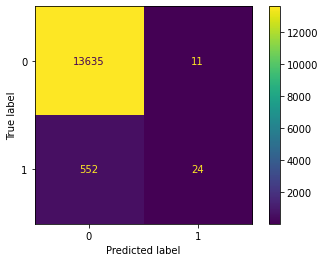

In [508]:
# PART I, 4 - Code
plot_confusion_matrix(lr_all, X, y)

PART I, 4 - Free Response

The confusion matrix tells us that the model is very accurate. We can see that the model was correct a total of 13,659 times, which we can tell by taking the sum of the top left and bottom right boxes. We can also see that the model was incorrect a total of 573 times, which are found by the sums of the bottom left and top right boxes. We see that a mast vajority of the data comes from when the true value is 0, and the model correctly predicted 0. Although we know the model is decently accurate from both the accuracy score and this confusion matrix, it is important to note that our model is predicted 0 99.7% of the time. While these predictions were correct for the most part, it still had some inaccuracies. There were only 11 times in which the true value was 0 and the predicted was 1 and only 24 times in which the true value was 1 and the predicted value was 1. 

## PART II

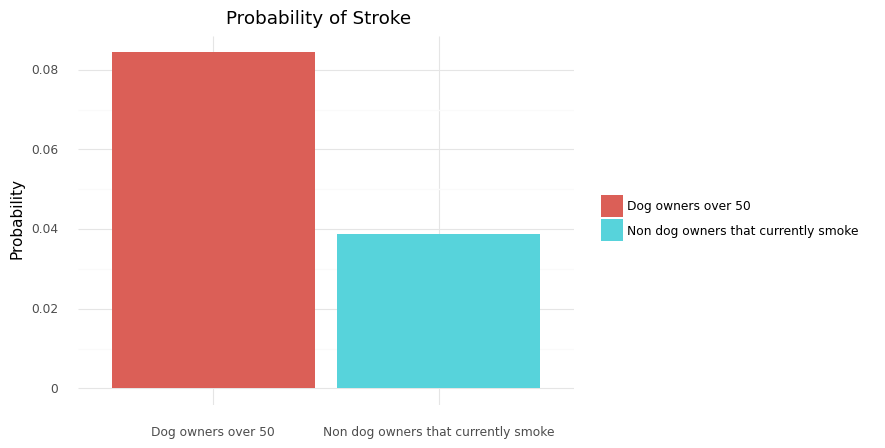

<ggplot: (8762909702672)>

In [509]:
# PART II, 1

ownersAboveFifty = (proj["age"] >= 50) & (proj["dog_owner"] == 1)
numOwnersAboveFifty = ownersAboveFifty.sum()
ownersWithStroke = (proj["stroke"] == 1) & (ownersAboveFifty)
numOwnersWithStroke = ownersWithStroke.sum()

probOwnerWithStroke = (numOwnersWithStroke/numOwnersAboveFifty)

nonOwnerSmoker = (proj["smoking_status_smokes"] == 1) & (proj["dog_owner"] == 0)
numNonOwnerSmoker = nonOwnerSmoker.sum()
nonOwnerSmokerWithStroke = (proj["stroke"] == 1) & (nonOwnerSmoker)
numNonOwnerSmokerWithStroke = nonOwnerSmokerWithStroke.sum()

probNonOwnerSmokerWithStroke = (numNonOwnerSmokerWithStroke/numNonOwnerSmoker)

DF = pd.DataFrame({"Category": ["Dog owners over 50", "Non dog owners that currently smoke"], 
   "Probability":[probOwnerWithStroke, probNonOwnerSmokerWithStroke]})
                   
(ggplot(DF, aes(x = "Category", y = "Probability")) 
 + geom_bar(aes(fill = "Category"), stat = "identity")
 + labs(x = "", title = "Probability of Stroke")
 + theme_minimal()
 + theme(legend_title = element_blank()))

1. DISCUSSION + ANSWER HERE

As seen by our graph, dog owners over 50 have a significantly higher probability of having a stroke compared to non dog owners who currently smoke. We can tell because from our bar graph, the bar on the left is much higher than the bar on the ride. These calculations were made after we found the number of dog owners over 50 that have had strokes and non dog owners that smoke that have had strokes and divided them by the total amount of dog owners over 50 and non dog owners who smoke. By doing this, we found the probability and graphed them as such.

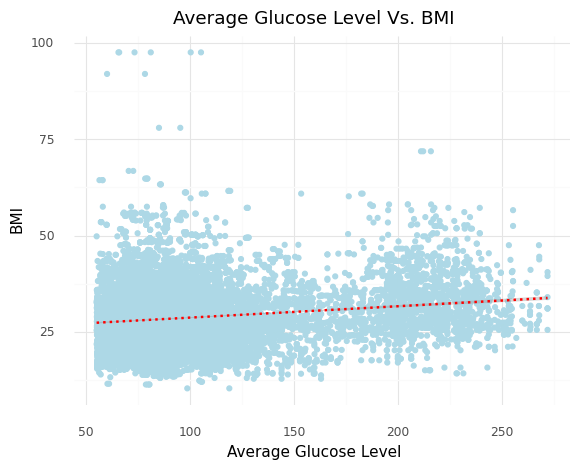

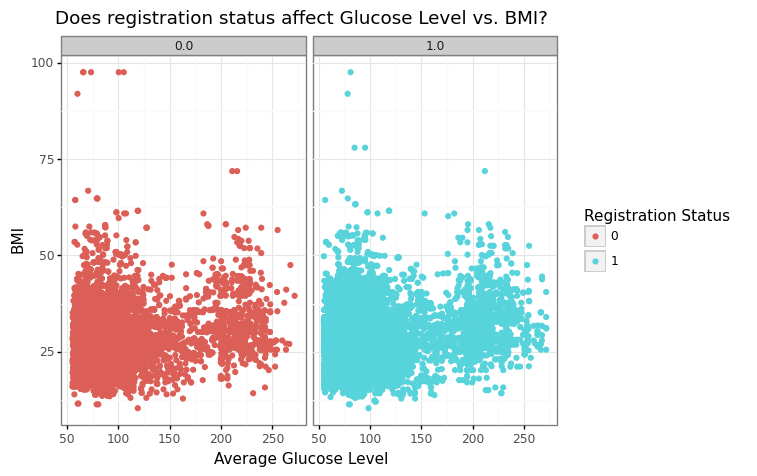

<ggplot: (8762874415101)>

In [510]:
# PART II, 2

print(ggplot(proj, aes(x = "avg_glucose_level", y = "bmi", )) 
 + geom_point(color = "lightblue") + geom_smooth(method = "lm", linetype = "dotted", color = "red")
 + labs(x = "Average Glucose Level", y = "BMI", title = "Average Glucose Level Vs. BMI")
 + theme_minimal())

(ggplot(proj, aes(x = "avg_glucose_level", y = "bmi")) 
 + geom_point(aes(color = "factor(reg_to_vote)"))
 + facet_wrap("~reg_to_vote")
 + labs(x = "Average Glucose Level", y = "BMI", title = "Does registration status affect Glucose Level vs. BMI?")
 + theme_bw()
 + theme(legend_title = element_text(text = "Registration Status"))) 

2. DISCUSSION + ANSWER HERE

After plotting the two different graphs, we can see that there is no distinct relationship between bmi and average gluclose level. In the first graph, I plot a line of best fit to check for some relationship between them. We can see that the line is nearly horizontal, indicating little to no relationship between the variables. Moreover, we can see that there is no variation between these variables depending on if the person was registered to vote or not. Regardless of that person's registration status, the graphs look almost identitical. 

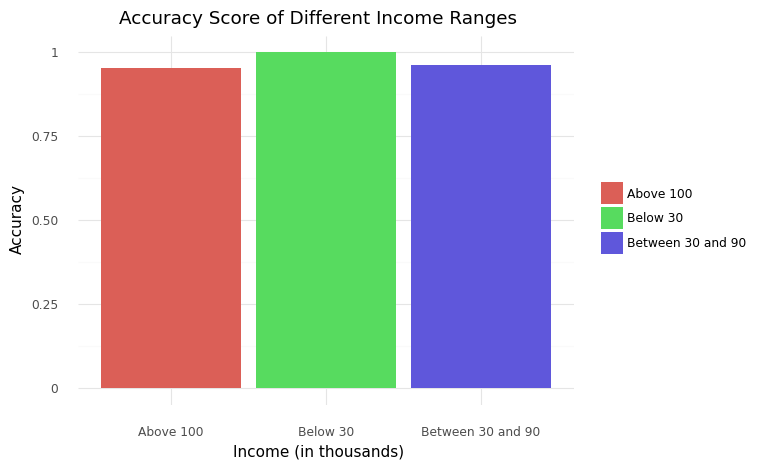

<ggplot: (8762857869376)>

In [511]:
# PART II, 3

predictions = lr_all.predict(X)
proj["predicted"] = predictions

lower = proj[proj["income_in_k"] <= 30]
middle = proj[(proj["income_in_k"] >= 30) & (proj["income_in_k"] <= 90)]
higher = proj[proj["income_in_k"] >= 100]

lowerScore = (accuracy_score(lower["stroke"], lower["predicted"]))
middleScore = (accuracy_score(middle["stroke"], middle["predicted"]))
higherScore = (accuracy_score(higher["stroke"], higher["predicted"]))

df2 = pd.DataFrame({"Income in K": ["Below 30", "Between 30 and 90", "Above 100"], 
                    "Accuracy": [lowerScore, middleScore, higherScore]})

(ggplot(df2, aes(x = "Income in K", y = "Accuracy")) + geom_bar(aes(fill = "Income in K"), stat = "identity")
 + theme_minimal()
 + labs(x = "Income (in thousands)", title = "Accuracy Score of Different Income Ranges")
 + theme(legend_title = element_blank()))

3. DISCUSSION + ANSWER HERE

The logistic regression model was the most accurate for the income range below 30 thousand dollars. We can see that it had an accuracy score of 1.0, meaning it was correct on every occasion. I would also argue that the model is very accurate for the other income ranges as well. To cover 95% of the variation still means that you had a pretty decent model. However, the model should try and make all the different income ranges equal. While they are still very close, there could be some ethical concerns that arise with people being unhappy that their certain income range is less accurate than other ranges. Again, it does not seem to be a big deal here, but still something to look out for. 

        Predictors      Coef  Log Odds
3     ever_married -0.187965  0.828644
4   Residence_type -0.019790  0.980405
9      reg_to_vote -0.059925  0.941835
10       dog_owner  0.015419  1.015539


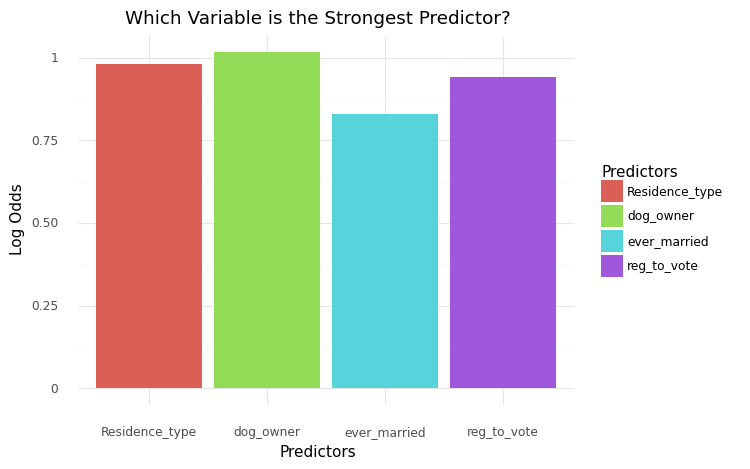

<ggplot: (8762930328104)>

In [512]:
# PART II, 4
coefSubSet = coef[(coef["Predictors"] == "Residence_type") | (coef["Predictors"] == "dog_owner") |
    (coef["Predictors"] == "reg_to_vote") |
    (coef["Predictors"] == "ever_married")] 

coefSubSet["Log Odds"] = np.exp(coefSubSet["Coef"])

print(coefSubSet.head())

(ggplot(coefSubSet, aes(x = "Predictors", y = "Log Odds")) 
 + geom_bar(aes(fill = "Predictors"), stat = "identity")
 + labs(x = "Predictors", y = "Log Odds", title = "Which Variable is the Strongest Predictor?")
 + theme_minimal())

4. DISCUSSION + ANSWER HERE

After making our ggplot bar graph, it is evident that dog_owner is the strongest predictor of having a stroke. We can see that it is the only variable to have log odds of greater than 1, meaning that over time it is the only variable whose odds will increase over time. Because of this fact, and because it is also the tallest bar in our bar graph, we can conclude that dog_owner is the variable with the strongest predictor. 

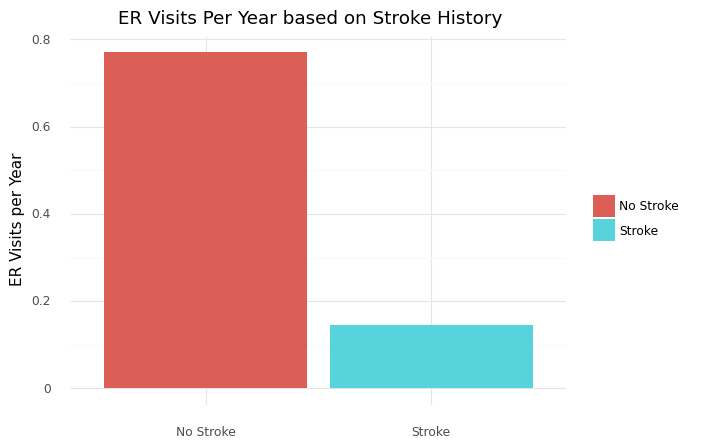

<ggplot: (8762911120671)>

In [513]:
# PART II, 5

totalERVisits = proj["er_visits"]
userAge = (proj["age"])

erVisitsPerYear = (totalERVisits/userAge)

proj["er_visits_per_year"] = erVisitsPerYear

strokePatientsDF = proj[proj['stroke'] == 1]
nonStrokePatientsDF = proj[proj['stroke'] == 0]

strokePatientsAvg = strokePatientsDF["er_visits_per_year"].mean()
nonStrokePatientsAvg = nonStrokePatientsDF["er_visits_per_year"].mean()

df = pd.DataFrame({"Did they have a stroke?": ["Stroke", "No Stroke"],
                   "ER Visits per Year": [strokePatientsAvg, nonStrokePatientsAvg]})

(ggplot(df, aes(x = "Did they have a stroke?", y = "ER Visits per Year"))
 + geom_bar(aes(fill = "Did they have a stroke?"), stat = "identity")
 + labs(x = "", title = "ER Visits Per Year based on Stroke History")
 + theme_minimal()
 + theme(legend_title = element_blank()))

5. DISCUSSION + ANSWER HERE

As sad as it is, the number of ER visits per year is very different for those who have and have not had a stroke. The average for those who have not had a stroke is much greater, coming in around 0.77, while the average for those who have had a stroke is only around 0.15. We can tell this because we calculated the number of ER visits per year for each person and then grouped them based on if they have had a stroke or not. 